# Graph Neural Networks

## Comparing GNNs with Traditional Neural Networks

A typical Neural Network is just a function that maps an input to an output. What makes it special is that it can learn and accurately predict complex functions that occur in the real world.

It's constructed in layers of nodes (with a value associated with each node), where each node in a layer is connected to each node in the previous layer, meaning each node learns from ALL of the previous data.

A connection between nodes simply represents a weighted sum, or a linear transformation of the values in the previous layer.

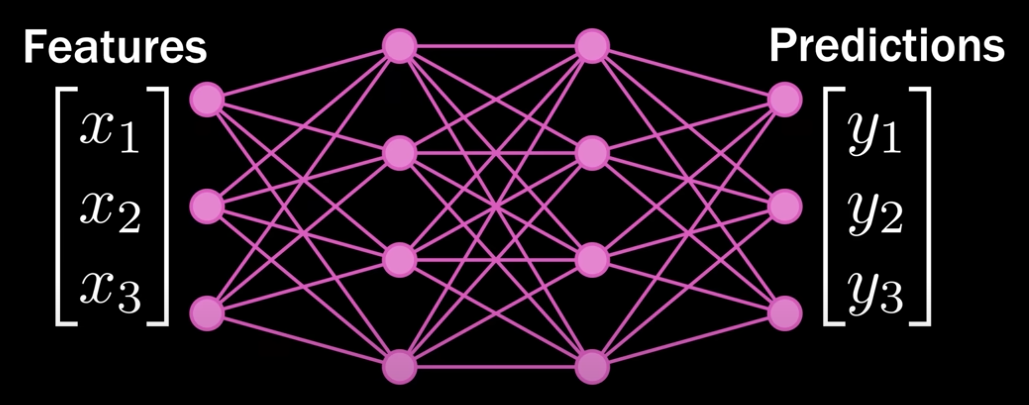

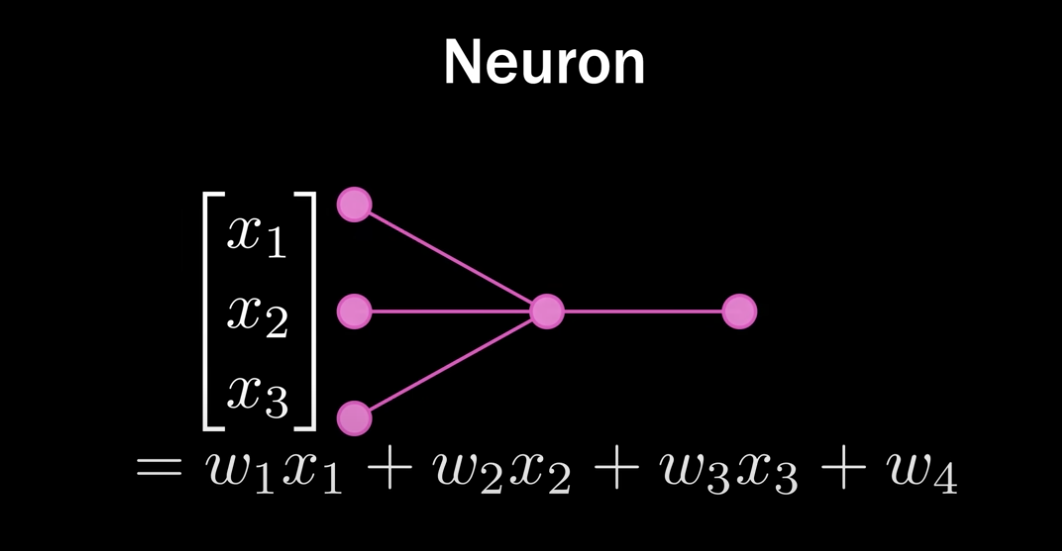

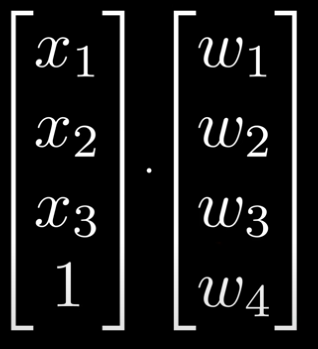

### Activation Function

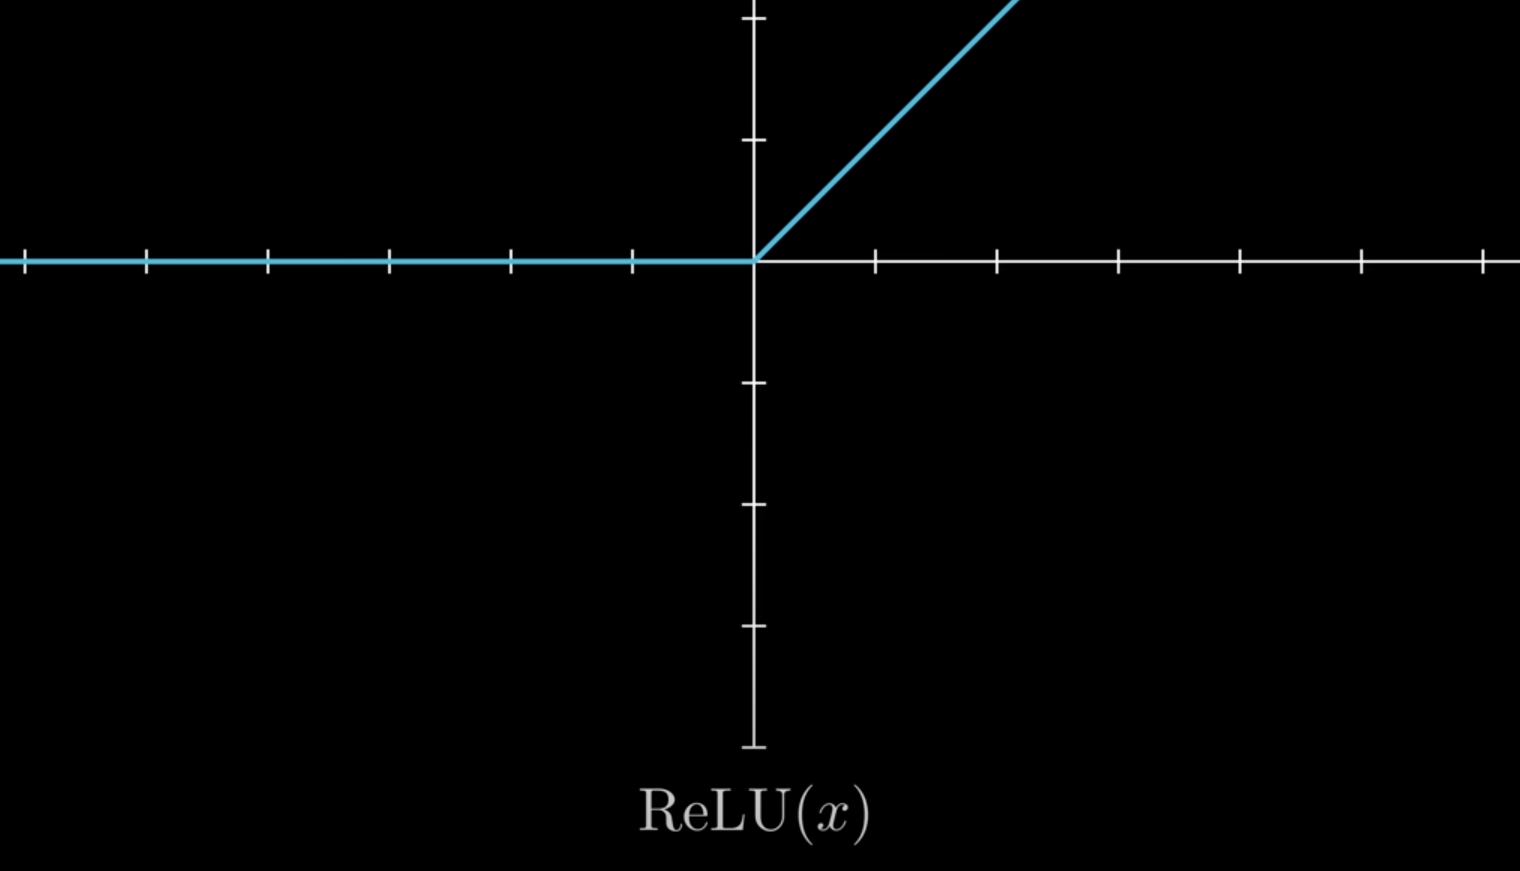

![Alt Text](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExMWNtdDAxZW9lZ3g2OHR1NjBkNGNjamFpZnNjbmxkbHVodmtjdzJmbiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/cQmpSFa6OwtedhHUvU/giphy.gif)



## Key Characteristics of Traditional Neural Networks

The input is really a vector with n features. Hidden layers can have any number of nodes, and there can be many or few hidden layers.

The output can be of the same dimension, but it's typically a reduction of features, or an interpretation of the relationship between the input data. Each layer creates an abstracted interpretation of the previous layer.

For binary classification (yes/no output) or regression (predicting a value in a range), the feature output would be 1-dimensional and calculated differently than multi-class problems.

## Why Graphs for Complex Problems?

Consider these questions:
- Is this molecule poisonous to humans based on its structure? 
- At what temperature will this molecule change phase?

With a standard neural network, we might pass in the elements as input. The network might learn relationships between the proportions of elements or how certain elements affect properties. But in chemistry, structure has a greater effect than just element presence. A standard network won't capture this correctly.

This is where we can introduce the problem as a graph problem.

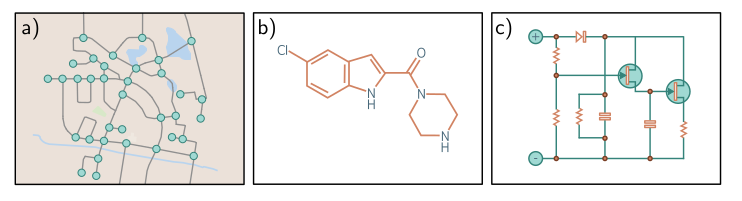

### Representing Molecules as Graphs

In a molecular problem, we can represent a molecule as a graph where:
- Edges are chemical bonds
- Nodes are elements

For our graph neural network input, each node will have a vector associated with it - 118 values (one for each element), populated with 0s except for a 1 representing its specific element. This is called a one hot vector.

This is an example input to a graph problem, each node has a vector associated with it. Each graph can be represented thus by 3 matrices, the Adjacency Matrix (referred to as $A$), the node embeddings $X$, and the edge embeddings $E$. Thinking about it, it makes sense that there is data associated with edges and nodes, in a road between two cities, there is distance and a speed limit, and in the cities there is a population, economy, tons of values. The adjacency matrix simply represents the graphs connections. 

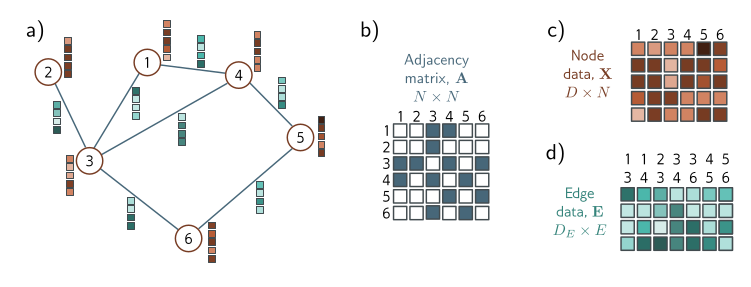

## Graph Convolutional Networks (GCNs)

To classify an entire molecule (graph) into a single value, we can use a Graph Convolutional Network.

Similar to a Neural Network, the GCN has layers, but the key difference is that GCNs consider information from neighboring nodes. This means we're learning the context of an element within a molecule and its relationship to other elements.

### How GCN Layers Work
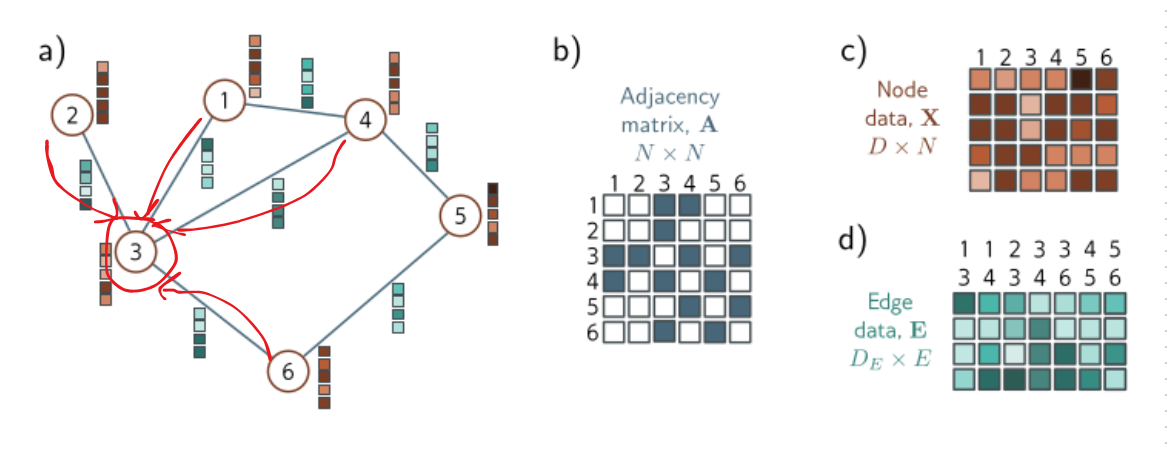
#### Layer 1:
1. Each node collects information from its neighbors
2. Each node sends out its own information
3. Each node updates its internal state using a neural network
   - This process is a linear transformation that reduces dimensions and recognizes patterns
   - These transformations use weight matrices that can be learned during training


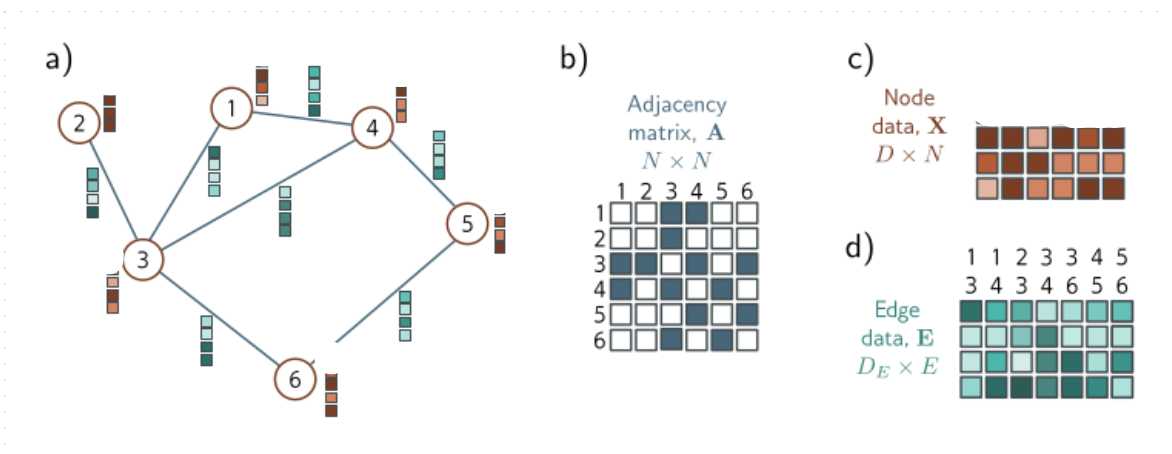

#### Layer 2 and Beyond:
The same pattern repeats, but each successive layer allows information to flow from more distant nodes.

For example, in the 2nd GCN layer, node 1 receives data from its neighbors (nodes 4 and 3). But in the first layer, nodes 4 and 3 already collected information from their neighbors. So by the second layer, node 1 has indirectly received information from nodes that are two steps away.

This pattern continues with deeper layers, allowing information to propagate across the graph. That's why the number of GCN layers determines how far information can travel - for problems where long-distance connections matter, we need more layers.


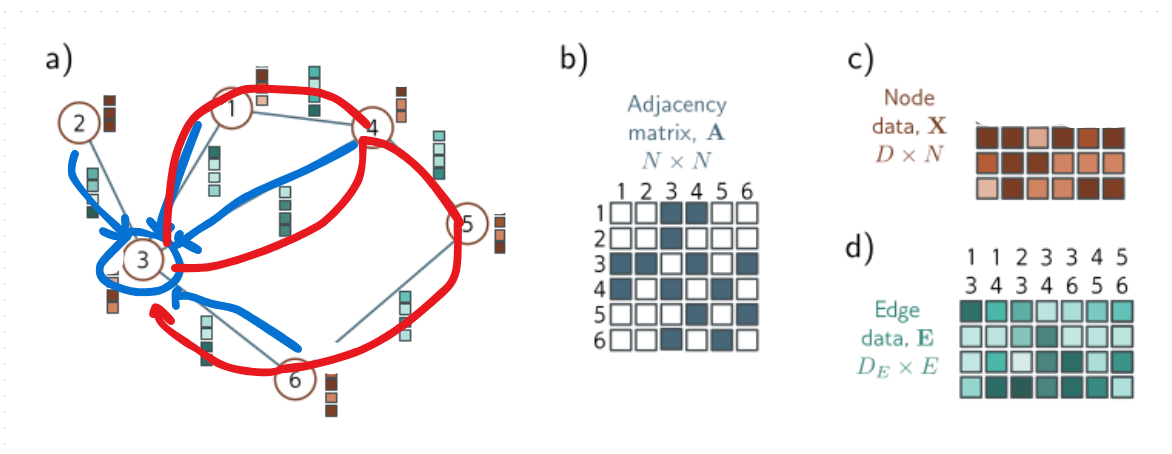

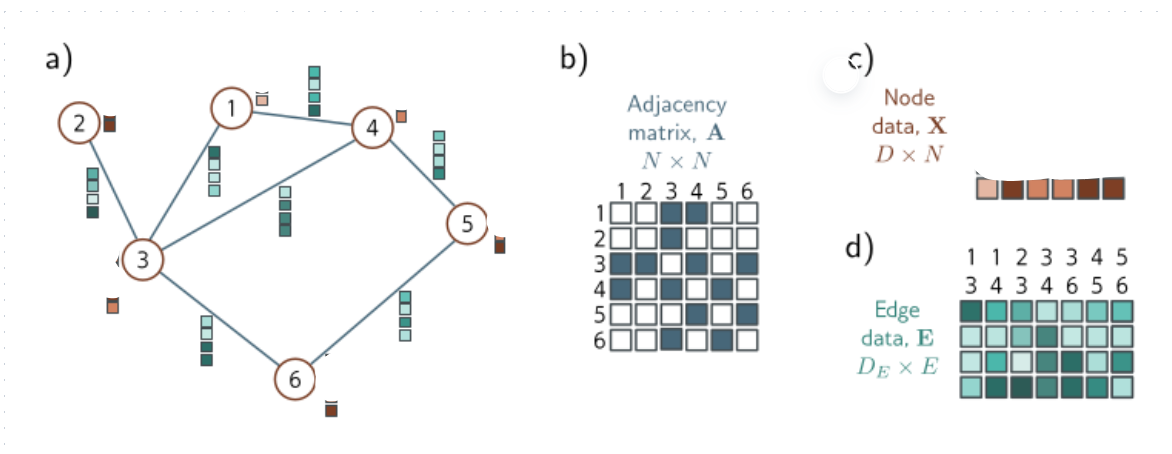


## Processing Molecular Data in Detail

For molecules, each node's initial vector is 118-dimensional (representing which element it is). In the first layer, we:

1. Collect and aggregate neighbor data for each node
2. Process this aggregated data through a linear transformation

Aggregation typically means summing the neighbors' vectors and taking their average, but there are multiple ways to accomplish this.

We process both the node's own vector and its neighbors' aggregated vector through a neural network or linear transformation with learned weights. This typically reduces the dimensionality (e.g., from 118 to 60), creating an abstracted interpretation of the element in its molecular context.

## From Node Representations to Predictions

Our end goal is to predict a property of the entire molecule, such as toxicity. The final step combines all node vectors with an activation function (like ReLU), applies weights and bias, and uses an appropriate loss function (like binary cross-entropy) for optimization.

What's important is that each node's final vector contains information about both the element itself and its context within the molecular structure.

This approach is quite different from a simple Neural Network. It's more similar to how NLP transformers handle sentences, where context matters greatly.

In an ideal scenario:
- First layers recognize simple element pairs (like H₂O, HCl)
- Middle layers recognize structural patterns (carbon chains, rings)
- Later layers capture complex interactions between these patterns
- Final layers make predictions about the entire molecule's properties

## Types of Graph Neural Network Problems

### We have not scratched the surface with graph problems. Some more common examples include Cities and Roads/Flights as Nodes and Edges (typically this may utilize pathfinding and finding shortest distance/walk). Other problems may be social media networks where nodes are people/accounts, and a connection is a friendsihp. Images can be thought of as graphs, so can 3d shapes or point clouds. 

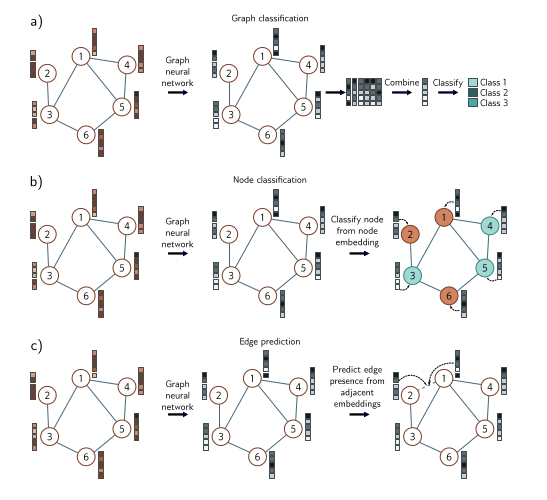

- **Graph-Level Problems**: Predicting properties of entire graphs (like molecular toxicity)

   For graph-level tasks, the output node embeddings are combined (e.g., by averaging),
and the resulting vector is mapped via a linear transformation or neural network to a
fixed-size vector. For regression, the mismatch between the result and the ground truth
values is computed using the least squares loss. For binary classification, the output
is passed through a sigmoid function, and the mismatch is calculated using the binary
cross-entropy loss. Here, the probability that the graph belongs to class one might be
given by:

     $P(r(y = 1 | X, A)) = \sigma \left[ \beta K + \omega K H_K \frac{1}{N} \right]$

- **Node-Level Problems**: Predicting properties of individual nodes

   Loss functions are defined in the same way as for graph-level
   tasks, except that now this is done independently at each node n:

   $P(r(y^{(n)} = 1 | X, A)) = \sigma \left( \beta K + \omega K h_K \right)$



- **Edge-Level Problems**: The network predicts whether or not there should be an edge
between nodes n and m. For example, in the social network setting, the network might
predict whether two people know and like each other and suggest that they connect if
that is the case. This is a binary classification task where the two node embeddings must
be mapped to a single number representing the probability that the edge is present. One
possibility is to take the dot product of the node embeddings and pass the result through
a sigmoid function to create the probability:

   $P(r(y^{(mn)} = 1 | X, A)) = \sigma \left( h^{(m)T} h^{(n)} \right)$


## Adjacency Matrix

The adjacency matrix represents connections in a graph. For a graph with n nodes, it's an n×n matrix where entry (i,j) indicates whether nodes i and j are connected.

In GNNs, this matrix helps determine which nodes can share information with each other during the message-passing steps.

# GCN Layers

Each layer of the GCN is a function F[•] with parameters Φ that takes the node
embeddings and adjacency matrix and outputs new node embeddings. The network can
hence be written as:

$$
\begin{aligned}
H_1 &= F[X, A, \phi_0] \\
H_2 &= F[H_1, A, \phi_1] \\
H_3 &= F[H_2, A, \phi_2] \\
&\vdots \\
H_K &= F[H_{K-1}, A, \phi_{K-1}]
\end{aligned}
$$

X is the input, A is the adjacency matrix, Hk contains the modified node em-
beddings at the k th layer, and ϕk denotes the parameters that map from layer k to
layer k+1.

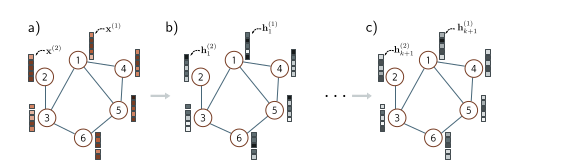

At each node n in layer k,
we aggregate information from neighboring nodes by summing their node embeddings h• :

$\text{agg}[n, k] = \sum_{m \in \text{ne}[n]} h_k^{(m)}$

Then we apply a \( (n) \) linear transformation \( \Omega_k \) to the embedding \( h_k^{(n)} \) at the current node and to this aggregated value,  
add a bias term \( \beta_k \), and pass the result through a nonlinear activation function \( a[\cdot] \),  
which is applied independently to every member of its vector argument:

$$
h_{k+1}^{(n)} = a \left( \beta_k + \Omega_k \cdot h_k^{(n)} + \Omega_k \cdot \text{agg}[n, k] \right)
$$

The \(n\)th column of the adjacency matrix \(A\) contains ones at the positions of the neighbors. Hence, if we collect the node embeddings into the \(D \times N\) matrix \(H_k\) and post-multiply by the adjacency matrix \(A\), the \(n\)th column of the result is \(\text{agg}[n, k]\). The update for the nodes is now:

$$
H_{k+1} = \alpha \beta_k \mathbf{1}^T + \Omega_k H_k + \Omega_k H_k A
$$

$$
= \alpha \beta_k \mathbf{1}^T + \Omega_k H_k (A + I),
$$

where \(\mathbf{1}\) is an \(N \times 1\) vector containing ones. Here, the nonlinear activation function \(a[\cdot]\) is applied independently to every member of its matrix argument.




We now combine these ideas to describe a network that classifies molecules as toxic or harmless. The network inputs are the adjacency matrix and node embedding matrix \(X\). The adjacency matrix \(A \in \mathbb{R}^{N \times N}\) derives from the molecular structure. The columns of the node embedding matrix \(X \in \mathbb{R}^{118 \times N}\) are one-hot vectors indicating which of the 118 elements of the periodic table are present. In other words, they are vectors of length 118 where every position is zero except for the position corresponding to the relevant element, which is set to one. The node embeddings can be transformed to an arbitrary size \(D\) by the first weight matrix \(\Omega_0 \in \mathbb{R}^{D \times 118}\).

The network equations are:

$$
H_1 = H_2 = \dots = H_K = f[X, A, \Phi] =
$$

$$
\alpha \beta_0 \mathbf{1}^T + \Omega_0 X (A + I)
$$

$$
\alpha \beta_1 \mathbf{1}^T + \Omega_1 H_1 (A + I)
$$

$$
\vdots
$$

$$
\alpha \beta_{K-1} \mathbf{1}^T + \Omega_{K-1} H_{K-1} (A + I)
$$

$$
\sigma \left[ \beta_K + \omega_K H_K \frac{1}{N} \right],
$$

where the network output \(f[X, A, \Phi]\) is a single value that determines the probability that the molecule is toxic.



# Training

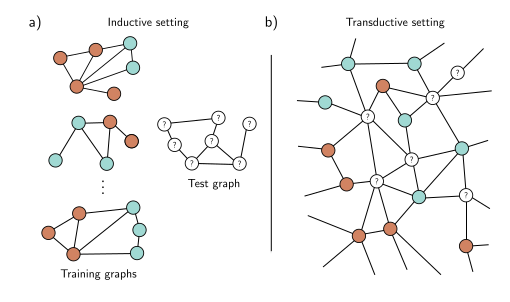

### Inductive vs. Transductive Models:
Inductive models learn a rule mapping inputs to outputs and apply it to new data. Transductive models consider both labeled and unlabeled data simultaneously to label unknown outputs. GNNs can be applied in both settings. "By contrast, a transductive model considers both the labeled and unlabeled data at the same time. It does not produce a rule but merely a labeling for the unknown outputs."

### Batching:
Graphs in a batch are treated as disjoint components of a single large graph, which allows for parallel processing.

### Batching on Large Graphs:

To overcome memory and computational issues with very large graphs, neighborhood sampling and graph partitioning methods are used to form batches.

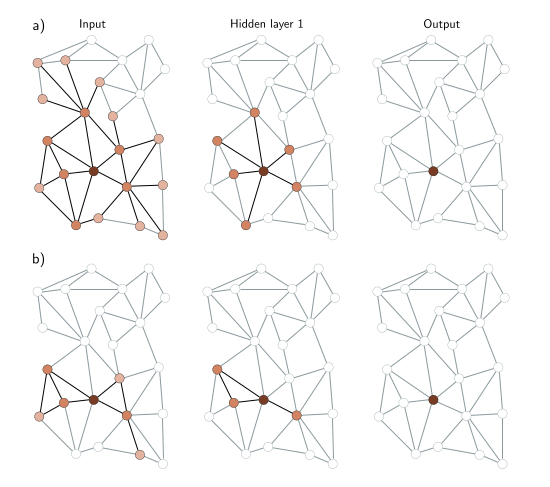

# Different Types of Aggregation

### Mean Aggregation
Instead of summing the node embeddings, we can take the average of the neighbors. This is useful when embedding information is more important than structural information. The average is computed as:

$$
\text{agg}[n] = \frac{1}{|\text{ne}[n]|} \sum_{m \in \text{ne}[n]} h_m,
$$

where \(\text{ne}[n]\) represents the neighbors of node \(n\). This can be computed efficiently using the degree matrix \(D\), where \(D^{-1}\) contains the normalization factors:

$$
H_{k+1} = a \left( \beta_k \mathbf{1}^T + \Omega_k H_k \left( A D^{-1} + I \right) \right).
$$

### Kipf Normalization
In Kipf normalization, the node's neighbors are included in the mean calculation. The aggregation is normalized to account for nodes with many neighbors, down-weighting their contribution:

$$
\text{agg}[n] = \sum_{m \in \text{ne}[n]} \frac{h_m}{|\text{ne}[n]| |\text{ne}[m]|},
$$

This is expressed in matrix form as:

$$
H_{k+1} = a \left( \beta_k \mathbf{1}^T + \Omega_k H_k \left( D^{-1/2} A D^{-1/2} + I \right) \right).
$$

### Max Pooling Aggregation
Max pooling computes the element-wise maximum of the neighbors’ embeddings:

$$
\text{agg}[n] = \max_{m \in \text{ne}[n]} h_m.
$$

### Aggregation by Attention
In graph attention layers, the weight of each neighbor’s contribution depends on the node data. The transformed node embeddings are computed as:

$$
H'_k = \beta_k \mathbf{1}^T + \Omega_k H_k.
$$

The similarity between node embeddings is computed by taking the dot product of the transformed embeddings.


# Graph Attentions

### We want to promote critical analysis in our model, so graph attention is realizing what connections are most imporant to a predictive outcome

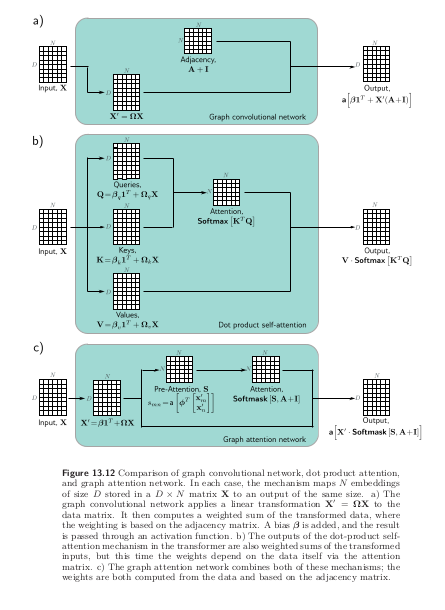